# 3Hands On: Data Exploration

In [31]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "carins"

## 1 Summarization


### Load the data set carIns final. It already has the imputation of missing values

In [3]:
# Cargar el archivo RData
load("/kaggle/input/carins/carIns_final.Rdata")

# Obtener la lista de objetos cargados en el archivo RData
ls()


[1] "auth"                      "carIns_final"             
[3] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
[5] "KAGGLE_BASE_URL"           "KAGGLE_IAP_TOKEN"         
[7] "KAGGLE_USER_SECRETS_TOKEN" "TokenBigQueryKernel"

#### 1. Using the package dplyr, answer the following questions:

**(a) Obtain the number of cars by bodyStyle.**

In [4]:
# Cargar el paquete dplyr
library(dplyr)

# Obtener el número de autos por estilo de carrocería
carIns_final %>%
  group_by(bodyStyle) %>%
  summarise(num_cars = n())


bodyStyle,num_cars
<fct>,<int>
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


**(b) Obtain the number of cars by bodyStyle and fuelType.**

In [5]:
# Obtener el número de autos por estilo de carrocería y tipo de combustible
carIns_final %>%
  group_by(bodyStyle, fuelType) %>%
  summarise(num_cars = n(), .groups = "drop")


bodyStyle,fuelType,num_cars
<fct>,<fct>,<int>
convertible,gas,6
hardtop,diesel,1
hardtop,gas,7
hatchback,diesel,1
hatchback,gas,69
sedan,diesel,15
sedan,gas,81
wagon,diesel,3
wagon,gas,22


**(c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.**

In [6]:
# Obtener la media y la desviación estándar de cityMpg por bodyStyle en orden ascendente
carIns_final %>%
  group_by(bodyStyle) %>%
  summarise(mean_cityMpg = mean(cityMpg),
            sd_cityMpg = sd(cityMpg)) %>%
  arrange(mean_cityMpg)


bodyStyle,mean_cityMpg,sd_cityMpg
<fct>,<dbl>,<dbl>
convertible,20.50000,3.391165
hardtop,21.62500,5.423165
wagon,24.04000,4.217819
sedan,25.32292,6.599035
hatchback,26.31429,7.169870


**(d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.**

In [7]:
# Obtener la media, desviación estándar, mediana y rango intercuartílico de cityMpg y highwayMpg por bodyStyle
carIns_final %>%
  # Agrupar los datos por bodyStyle
  group_by(bodyStyle) %>%
  # Calcular la media, desviación estándar, mediana y rango intercuartílico de cityMpg y highwayMpg
  summarise(mean_cityMpg = mean(cityMpg),        # Calcular la media de cityMpg
            sd_cityMpg = sd(cityMpg),            # Calcular la desviación estándar de cityMpg
            median_cityMpg = median(cityMpg),    # Calcular la mediana de cityMpg
            iqr_cityMpg = IQR(cityMpg),          # Calcular el rango intercuartílico de cityMpg
            mean_highwayMpg = mean(highwayMpg),  # Calcular la media de highwayMpg
            sd_highwayMpg = sd(highwayMpg),      # Calcular la desviación estándar de highwayMpg
            median_highwayMpg = median(highwayMpg),  # Calcular la mediana de highwayMpg
            iqr_highwayMpg = IQR(highwayMpg))    # Calcular el rango intercuartílico de highwayMpg


bodyStyle,mean_cityMpg,sd_cityMpg,median_cityMpg,iqr_cityMpg,mean_highwayMpg,sd_highwayMpg,median_highwayMpg,iqr_highwayMpg
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
convertible,20.50000,3.391165,21,5.25,26.00000,4.289522,27.0,3.00
hardtop,21.62500,5.423165,23,7.00,27.25000,6.088631,27.5,5.00
hatchback,26.31429,7.169870,26,12.00,32.17143,7.044314,31.5,11.75
sedan,25.32292,6.599035,25,11.25,30.83333,7.174027,30.5,11.25
wagon,24.04000,4.217819,24,5.00,28.72000,4.703899,29.0,7.00


# 2 Visualization

## 2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.

In [8]:
library(ggplot2)

**(e) Show the relationship between the attributes cityMpg and highwayMpg**

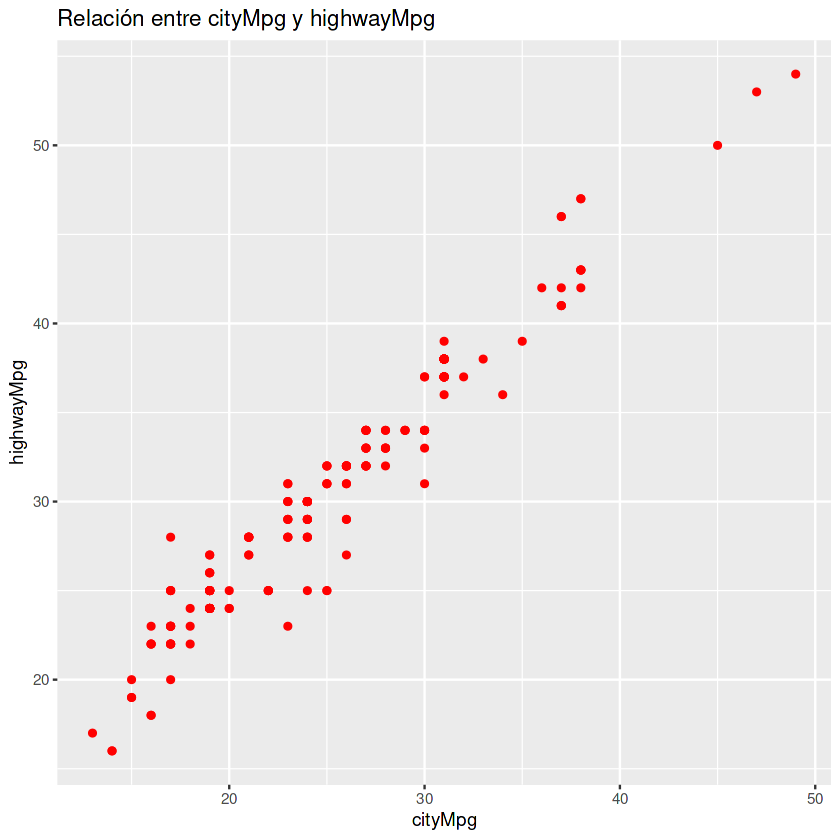

In [9]:
# Gráfico de dispersión de cityMpg y highwayMpg
ggplot(carIns_final, aes(x = cityMpg, y = highwayMpg)) +  # Especificar los atributos x e y del gráfico
  geom_point(color = "red") +  # Agregar puntos al gráfico
  labs(x = "cityMpg", y = "highwayMpg", title = "Relación entre cityMpg y highwayMpg")  # Etiquetas de los ejes y título del gráfico


**(f) Show the distribution of cars by bodyStyle.**

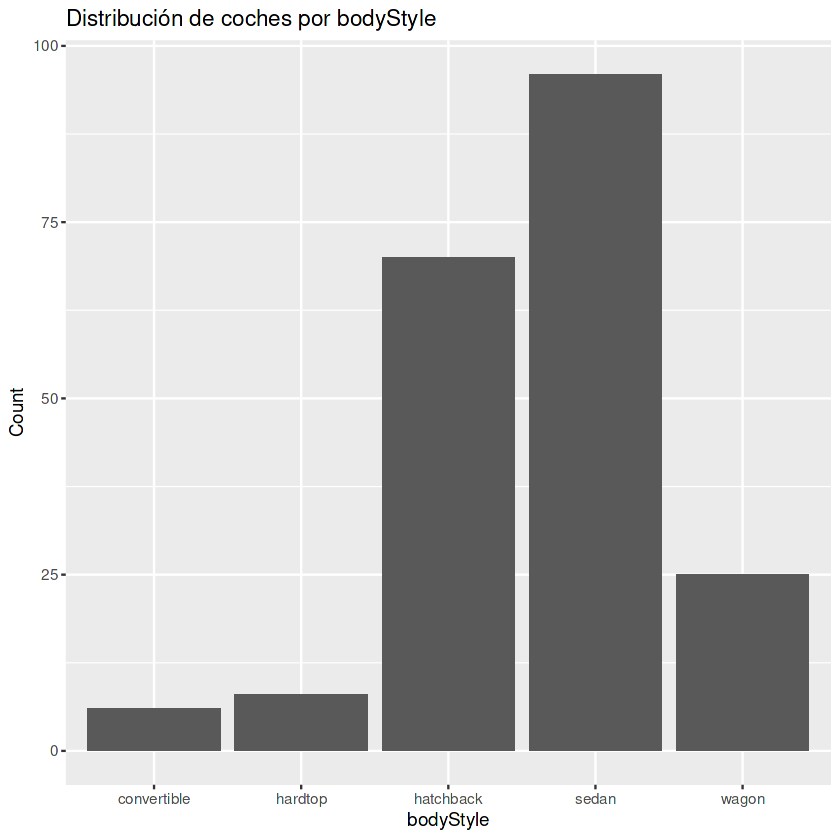

In [10]:
# Gráfico de barras de la distribución de los coches por bodyStyle
ggplot(carIns_final, aes(x = bodyStyle)) +  # Especificar el atributo x del gráfico
  geom_bar() +  # Agregar barras al gráfico
  labs(x = "bodyStyle", y = "Count", title = "Distribución de coches por bodyStyle")  # Etiquetas de los ejes y título del gráfico


**(g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000**

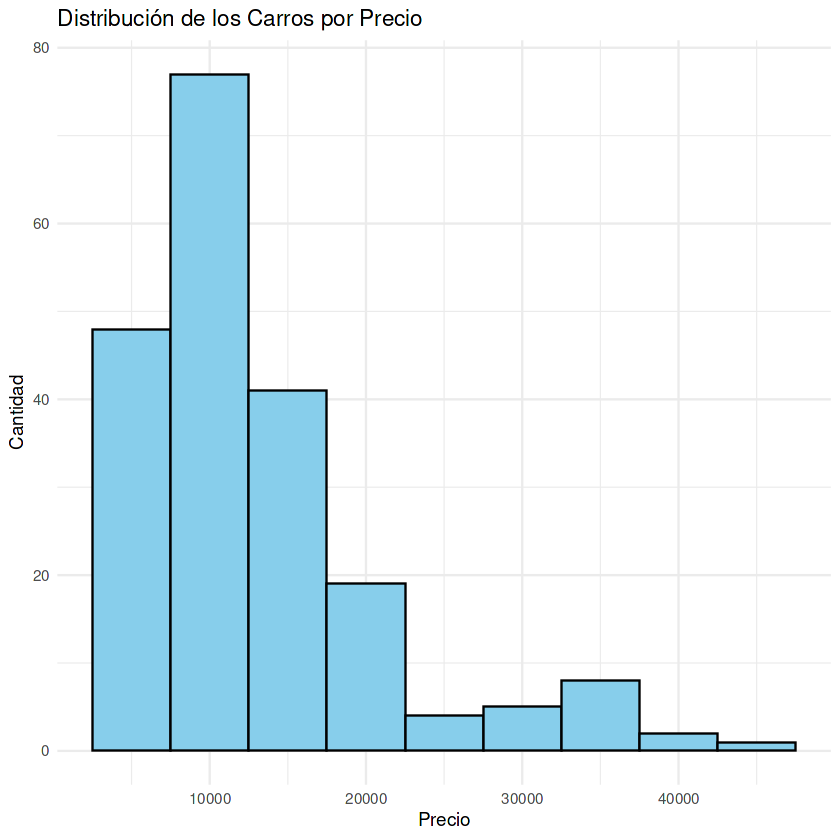

In [16]:
# Mostrar la distribución de los carros por su precio
# Crear bins de ancho igual a 5000
ggplot(carIns_final, aes(x = price)) +  # Establecer el atributo x como precio
  geom_histogram(binwidth = 5000, fill = "skyblue", color = "black") +  # Crear histograma con bins de ancho 5000, color de llenado "skyblue" y color de borde "black"
  labs(title = "Distribución de los Carros por Precio", x = "Precio", y = "Cantidad") +  # Establecer título del gráfico y etiquetas de los ejes x e y
  theme_minimal()  # Aplicar un tema minimalista al gráfico

**(h) Add the information of the density estimation to the previous graph.**

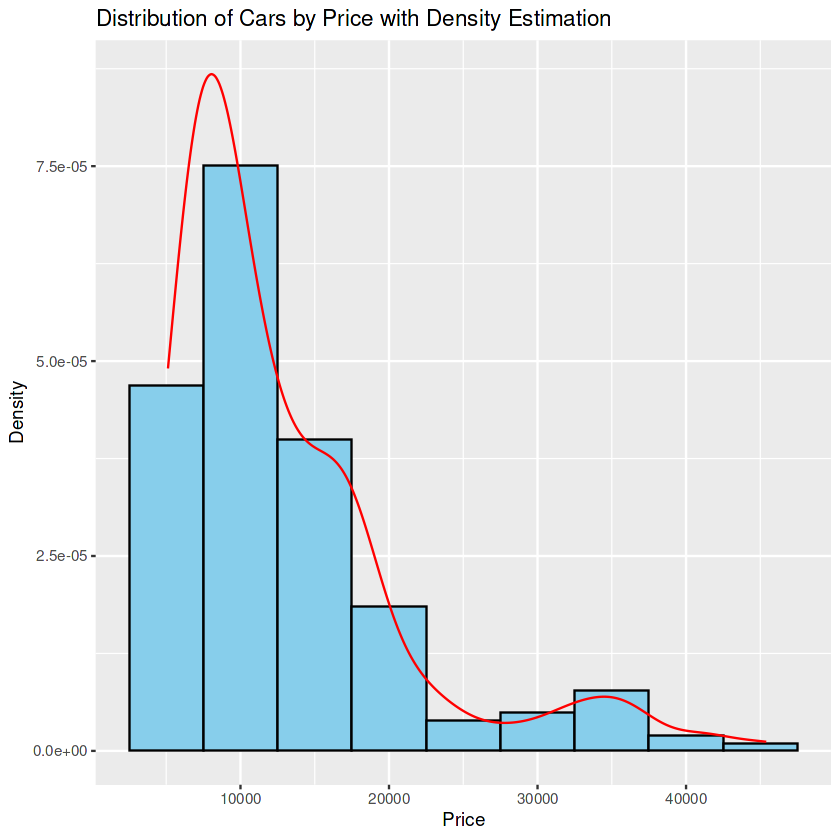

In [20]:
# Graficar la distribución de los carros por su precio
# Crear bins de ancho igual a 5000
# Agregar la estimación de densidad a la gráfica

ggplot(carIns_final, aes(x = price)) +  # Especificar los datos y la variable x
  geom_histogram(binwidth = 5000, fill = "skyblue", color = "black", aes(y = after_stat(density))) +  # Histograma con bins de ancho 5000 y densidad
  geom_density(alpha = 0.2, color = "red") +  # Estimación de densidad con transparencia y color rojo
  labs(title = "Distribution of Cars by Price with Density Estimation", x = "Price", y = "Density")  # Títulos de la gráfica y etiquetas de los ejes


**(i) Check (visually) if it is plausible to consider that price follows a normal distribution.**

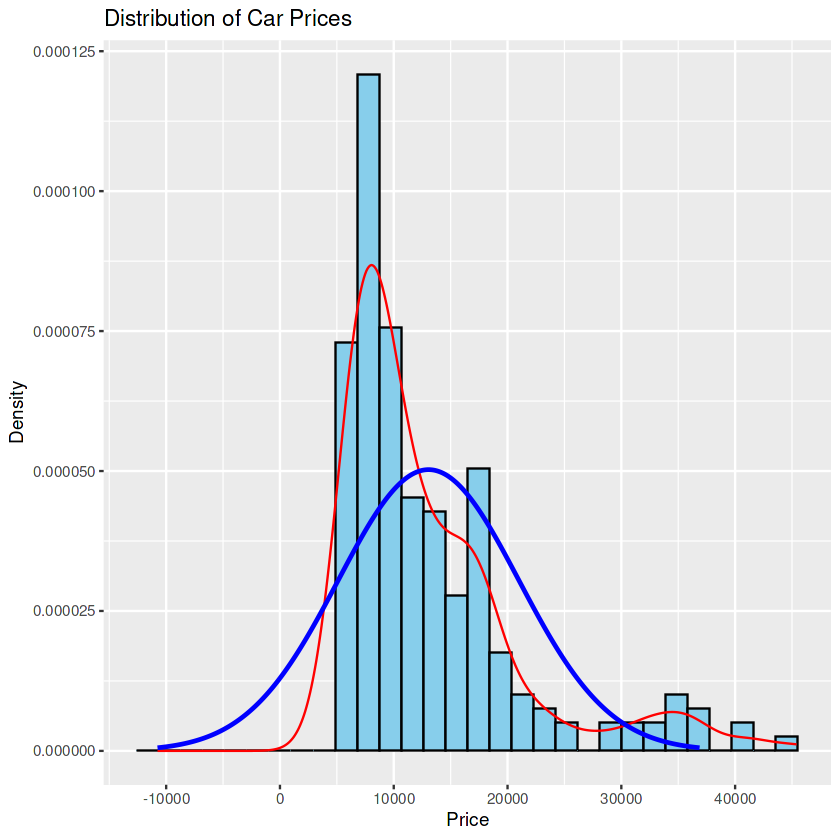

In [24]:
# Subconjunto de los datos para eliminar los valores faltantes
carIns_subset <- carIns_final %>% filter(!is.na(price))

# Calculamos la media y la desviación estándar del precio
price_mean <- mean(carIns_subset$price)  # Calcula la media del precio
price_sd <- sd(carIns_subset$price)      # Calcula la desviación estándar del precio

# Generar una curva de distribución normal basada en la media y la desviación estándar
price_normal_dist <- data.frame(price = seq(price_mean - 3*price_sd, price_mean + 3*price_sd, length.out = 1000))
price_normal_dist$density <- dnorm(price_normal_dist$price, mean = price_mean, sd = price_sd)

# Crear un histograma de la densidad y de la curva de distribución normal
ggplot() +
  geom_histogram(data = carIns_subset, aes(x = price, y = ..density..), fill = "skyblue", color = "black", bins = 30) +
  geom_density(data = carIns_subset, aes(x = price), color = "red") +
  geom_line(data = price_normal_dist, aes(x = price, y = density), color = "blue", linewidth = 1) +
  labs(title = "Distribution of Car Prices", x = "Price", y = "Density")


**(j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip().**

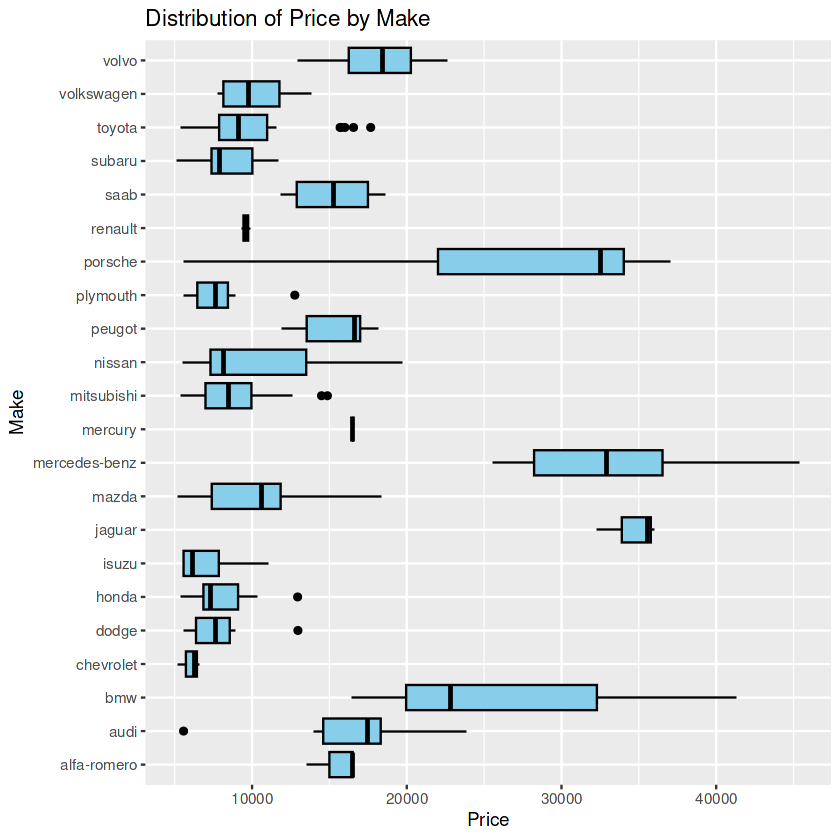

In [25]:
# Mostrar la distribución de precios por atributo "make"
ggplot(carIns_final, aes(x = make, y = price)) +
  geom_boxplot(fill = "skyblue", color = "black") +  # Crear boxplots
  coord_flip() +  # Intercambiar ejes x e y
  labs(title = "Distribution of Price by Make", x = "Make", y = "Price")  # Agregar título y etiquetas de ejes


**(k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.**

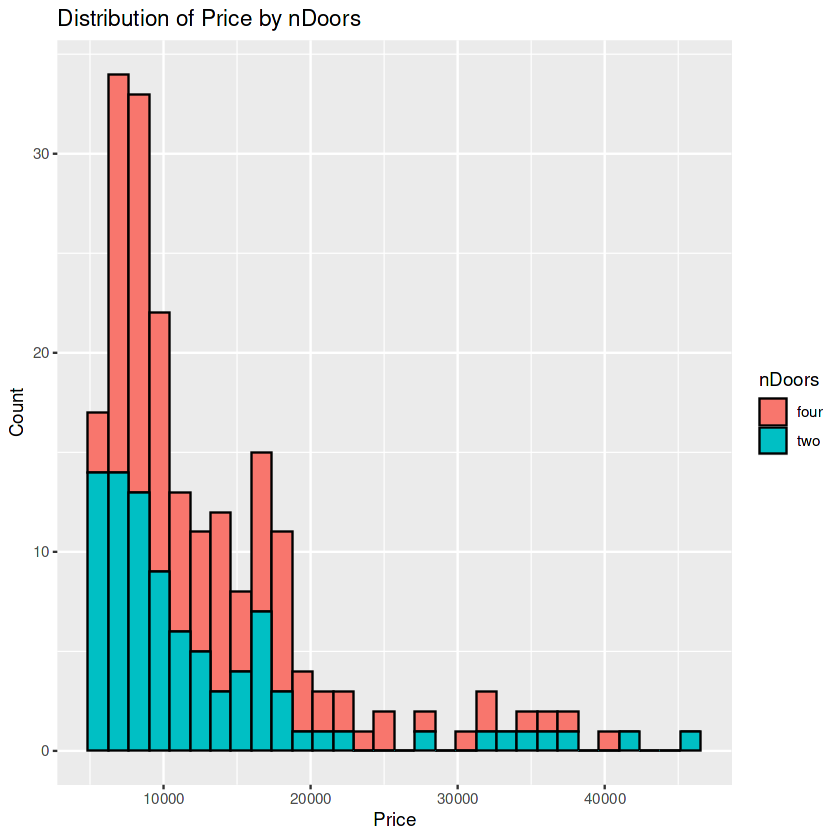

In [27]:
# Mostrar la distribución de precios por atributo "nDoors"
ggplot(carIns_final, aes(x = price)) +  # Crear el objeto de gráfico con el conjunto de datos y el mapeo estético
  geom_histogram(aes(fill = nDoors), bins = 30, color = "black") +  # Crear el histograma con colores según el atributo "nDoors"
  labs(title = "Distribution of Price by nDoors", x = "Price", y = "Count") +  # Agregar título y etiquetas a los ejes
  scale_fill_discrete(name = "nDoors")  # Establecer leyenda para el atributo "nDoors"


**(l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms**

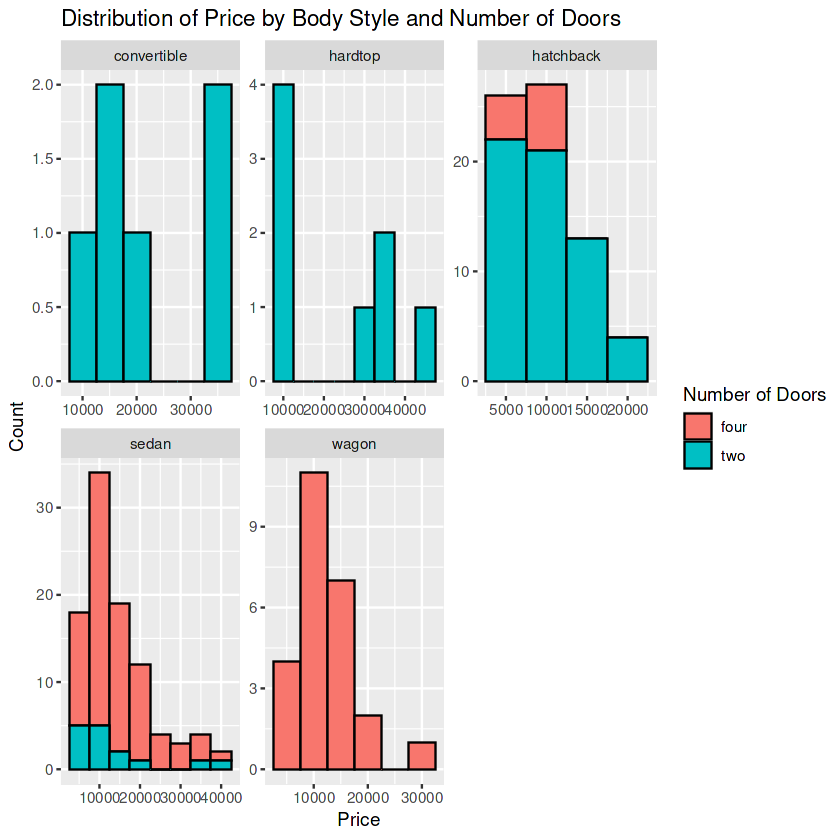

In [29]:
# Muestra la distribución del precio por atributos bodyStyle y nDoors.
# Sugerencia: usa histogramas

# Crea el gráfico base utilizando ggplot y establece el mapeo de variables
ggplot(carIns_final, aes(x = price, fill = nDoors)) +

  # Agrega el histograma con un ancho de bin de 5000 y un color de borde negro
  geom_histogram(binwidth = 5000, color = "black") +

  # Divide los paneles por los valores de bodyStyle, con 2 filas y escalas libres
  facet_wrap(~ bodyStyle, nrow = 2, scales = "free") +

  # Establece los títulos de los ejes y del gráfico
  labs(title = "Distribution of Price by Body Style and Number of Doors",
       x = "Price", y = "Count") +

  # Personaliza la leyenda del atributo nDoors
  scale_fill_discrete(name = "Number of Doors")


**(m) Add the parameter scales="free_y" to the facet function in the previous graph.**

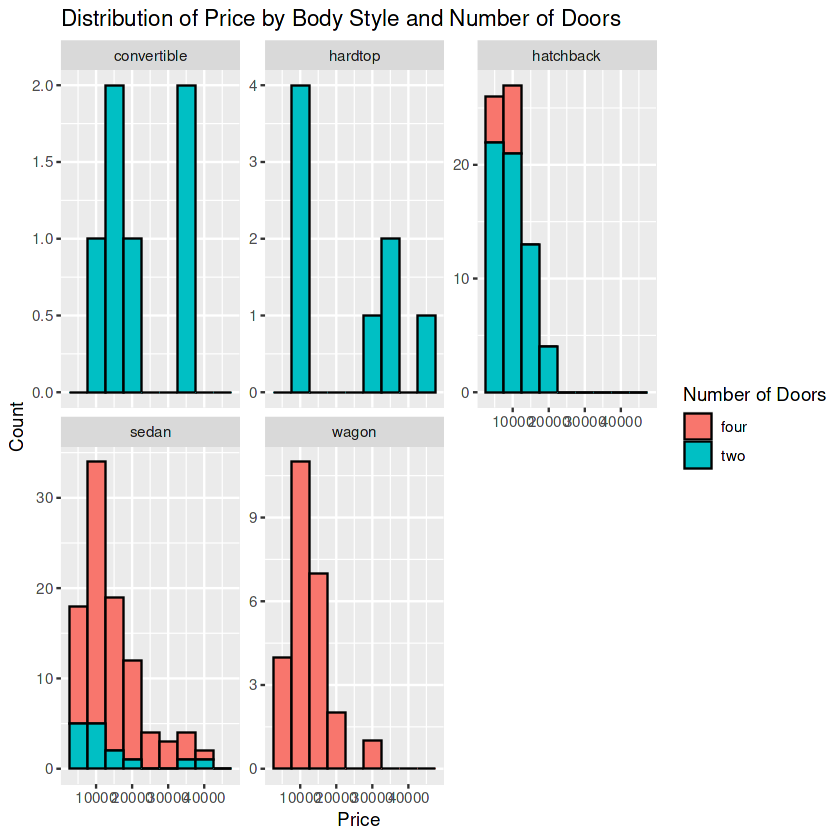

In [30]:
# Muestra la distribución del precio por atributos bodyStyle y nDoors.
# Sugerencia: usa histogramas

# Crea el gráfico base utilizando ggplot y establece el mapeo de variables
ggplot(carIns_final, aes(x = price, fill = nDoors)) +

  # Agrega el histograma con un ancho de bin de 5000 y un color de borde negro
  geom_histogram(binwidth = 5000, color = "black") +

  # Divide los paneles por los valores de bodyStyle, con 2 filas y escalas libres en el eje y
  facet_wrap(~ bodyStyle, nrow = 2, scales = "free_y") +

  # Establece los títulos de los ejes y del gráfico
  labs(title = "Distribution of Price by Body Style and Number of Doors",
       x = "Price", y = "Count") +

  # Personaliza la leyenda del atributo nDoors
  scale_fill_discrete(name = "Number of Doors")
